In [2]:
#import important libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Import important libraries such as pandas to read the csv file

In [3]:
df=pd.read_csv('updated_house_prices.csv')
X = df[['Carpet Area']]  # Features 
y = df['Amount(in Lac)']  # Target

target is amount(which is the price) of india in lakh and the features will be the carpet area 

- carpet area is the area where carpet can be placed , hence the name , such as drawing room  and bedroom .
- another factor that can affect the price can be classified in the features . In this example will be super area , number of bathroom and balcony , and also the place as well . 

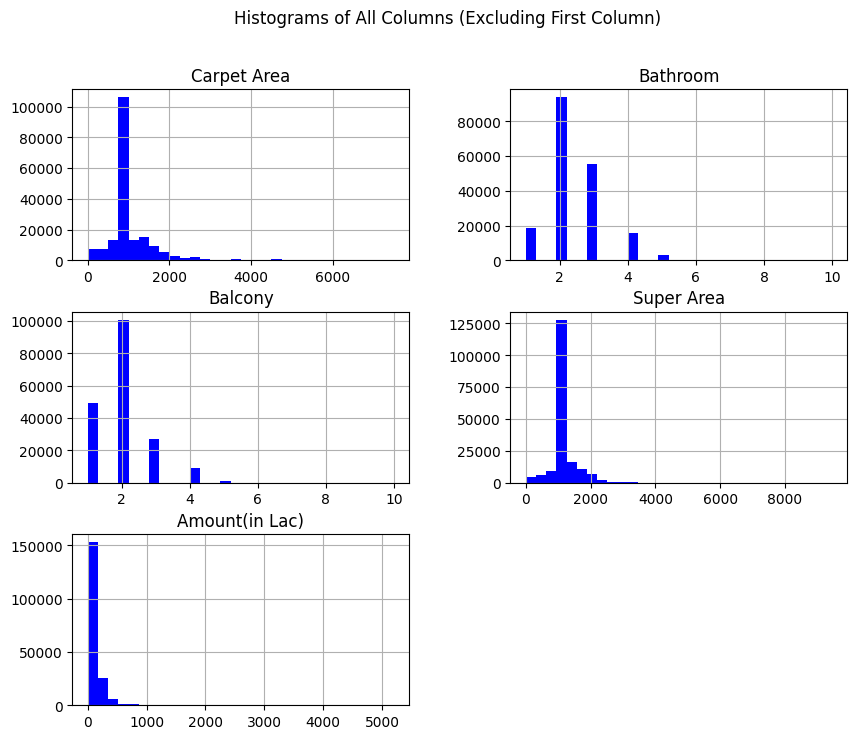

In [4]:
# Plotting histograms for each numerical column
df.iloc[:, 1:].hist(bins=30, figsize=(10,8), color='blue')
plt.suptitle('Histograms of All Columns (Excluding First Column)')
plt.show()


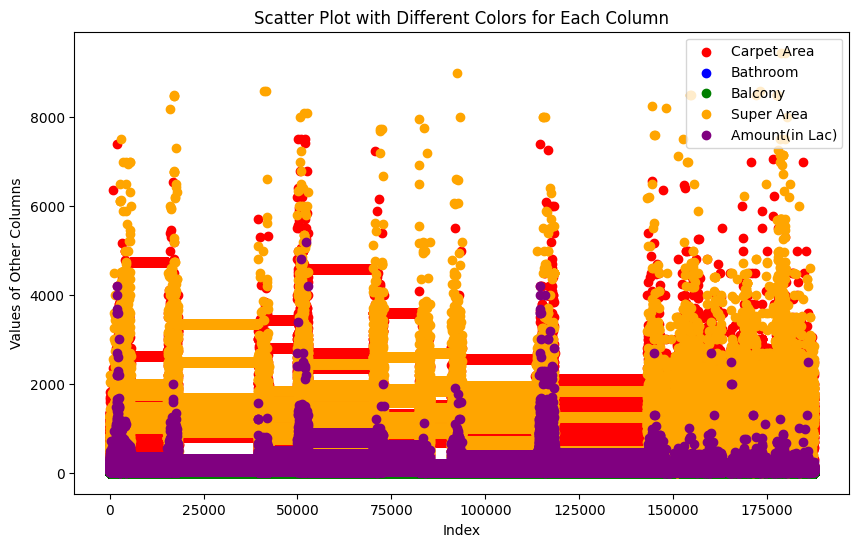

In [5]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']  # Define colors for each column

# Assuming we want to plot all features against the first column (e.g., column[0])
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns[1:]):
    plt.scatter(df[df.columns[0]], df[col], color=colors[i % len(colors)], label=col)

plt.xlabel(df.columns[0])
plt.ylabel('Values of Other Columns')
plt.title('Scatter Plot with Different Colors for Each Column')
plt.legend(loc='upper right')
plt.show()


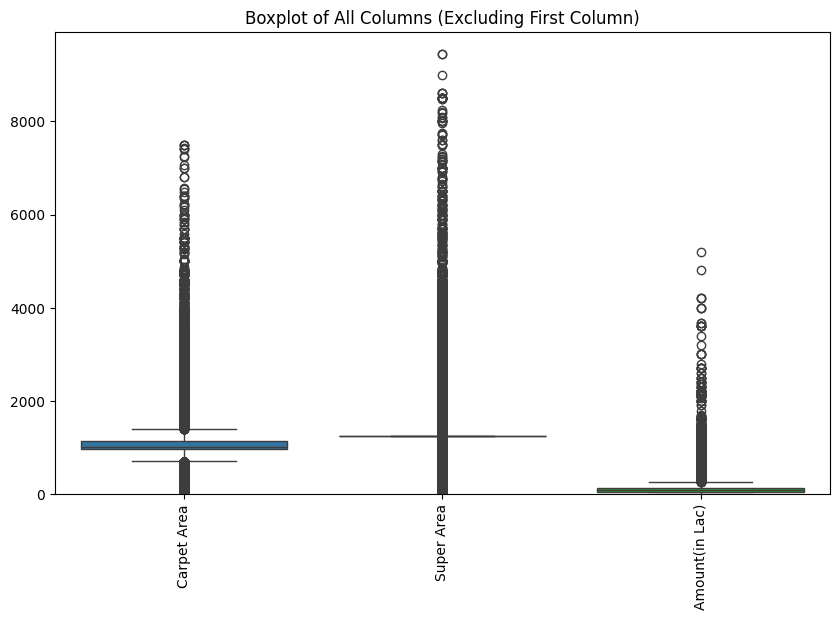

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and you want to ignore the first column
data_to_plot = df.iloc[:, [1,4,5]]  # Select all rows and specific columns by index

# Plotting boxplot for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title('Boxplot of All Columns (Excluding First Column)')
plt.ylim(0)
plt.show()

In [7]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = Ridge()
linear_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)


rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression RMSE: {rmse_linear}')
print(f'Linear Regression R²: {r2_linear}')




Linear Regression RMSE: 110.23176417435553
Linear Regression R²: 0.34195692066723027


2nd line is to create the linear regression model , and the test size is 20% of the data , then the training set will be 80%. using numpy , although the function(mean_square_error) is now deprecated by python3.12 , but it still define by its own , and runable . 

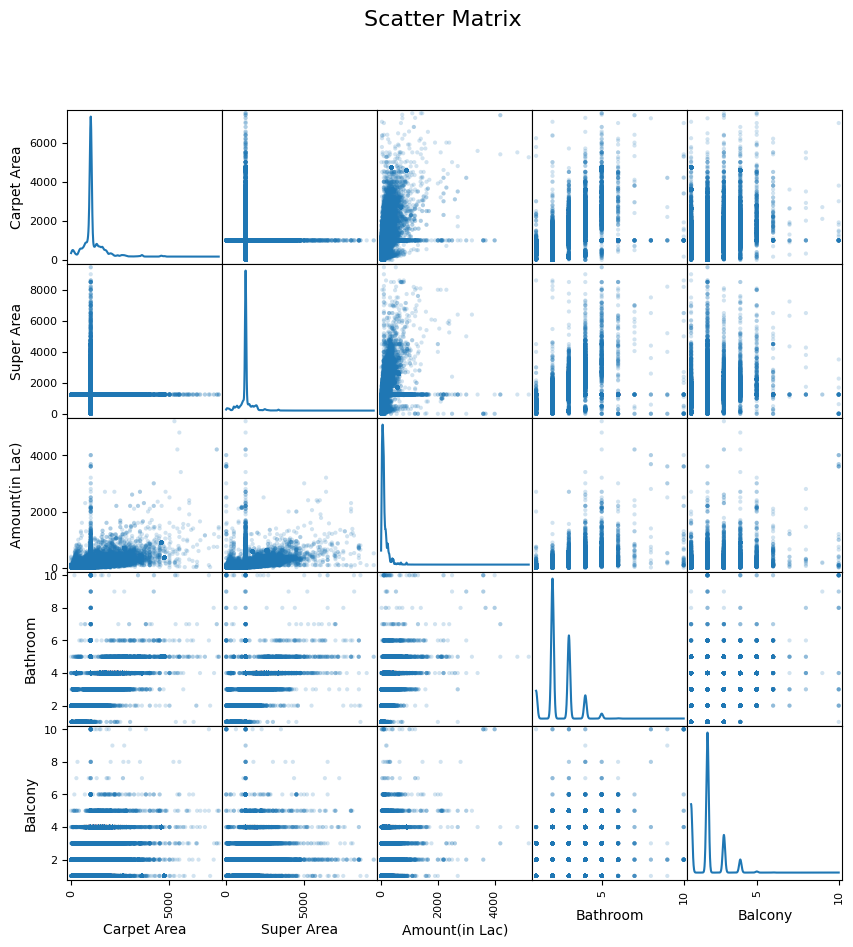

In [8]:
from pandas.plotting import scatter_matrix


numeric_cols = ['Carpet Area', 'Super Area', 'Amount(in Lac)','Bathroom','Balcony']


scatter_matrix(df[numeric_cols], figsize=(10, 10), diagonal='kde', alpha=0.2)
plt.suptitle('Scatter Matrix', size=16)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def perform_grid_search(model, param_grid, X_train, y_train, cv=10):
    grid_search = GridSearchCV(model, param_grid, cv=cv)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {'RMSE': rmse, 'R²': r2}

param_grid_ridge = {'alpha': [0.01, 0.1, 0.5, 0.8, 1]}
param_grid_lasso = {'alpha': [0.01, 0.1, 0.5, 0.8, 1]}

def train_and_evaluate_models(X_train, y_train, X_test, y_test):


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

  
    ridge_model = Ridge()
    best_ridge = perform_grid_search(ridge_model, param_grid_ridge, X_train_scaled, y_train)
    ridge_results = evaluate_model(best_ridge, X_test_scaled, y_test)
    
    print(f'Best Ridge Model: {best_ridge}')
    print(f'Ridge RMSE: {ridge_results["RMSE"]:.4f}')
    print(f'Ridge R²: {ridge_results["R²"]:.4f}')
    

    lasso_model = Lasso()
    best_lasso = perform_grid_search(lasso_model, param_grid_lasso, X_train_scaled, y_train)
    lasso_results = evaluate_model(best_lasso, X_test_scaled, y_test)
    
    print(f'Best Lasso Model: {best_lasso}')
    print(f'Lasso RMSE: {lasso_results["RMSE"]:.4f}')
    print(f'Lasso R²: {lasso_results["R²"]:.4f}')


train_and_evaluate_models(X_train, y_train, X_test, y_test)


Best Ridge Model: Ridge(alpha=1)
Ridge RMSE: 110.2318
Ridge R²: 0.3420
Best Lasso Model: Lasso(alpha=0.1)
Lasso RMSE: 110.2356
Lasso R²: 0.3419


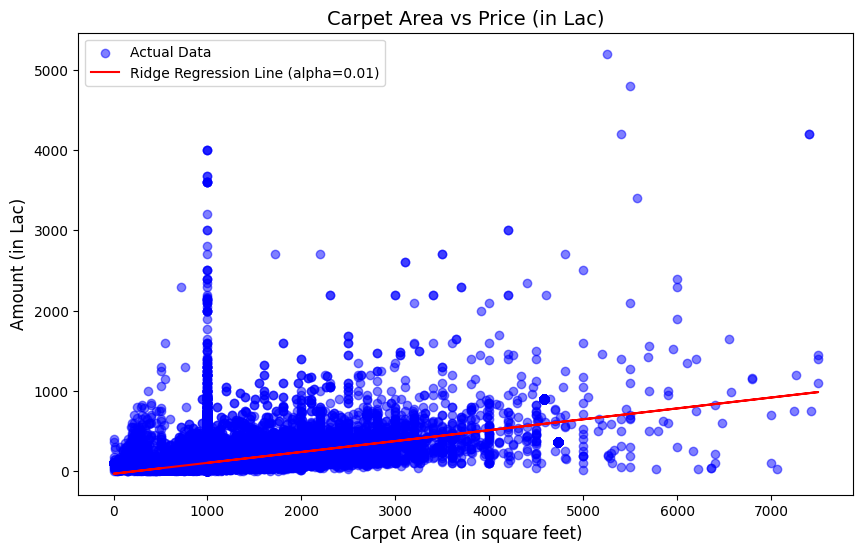

In [14]:
X_carpet = df['Carpet Area'].values.reshape(-1, 1)  
y_price = df['Amount(in Lac)'].values          


ridge_model = Ridge(alpha=1)
ridge_model.fit(X_carpet, y_price)

y_pred = ridge_model.predict(X_carpet)

plt.figure(figsize=(10, 6))

# Plot the actual data
plt.scatter(X_carpet, y_price, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(X_carpet, y_pred, color='red', label='Ridge Regression Line (alpha=0.01)')

plt.title('Carpet Area vs Price (in Lac)', fontsize=14)
plt.xlabel('Carpet Area (in square feet)', fontsize=12)  
plt.ylabel('Amount (in Lac)', fontsize=12) 
plt.legend()
plt.show()

Polynomial Regression RMSE: 96.51964976731
Polynomial Regression R²: 0.4954870891090506


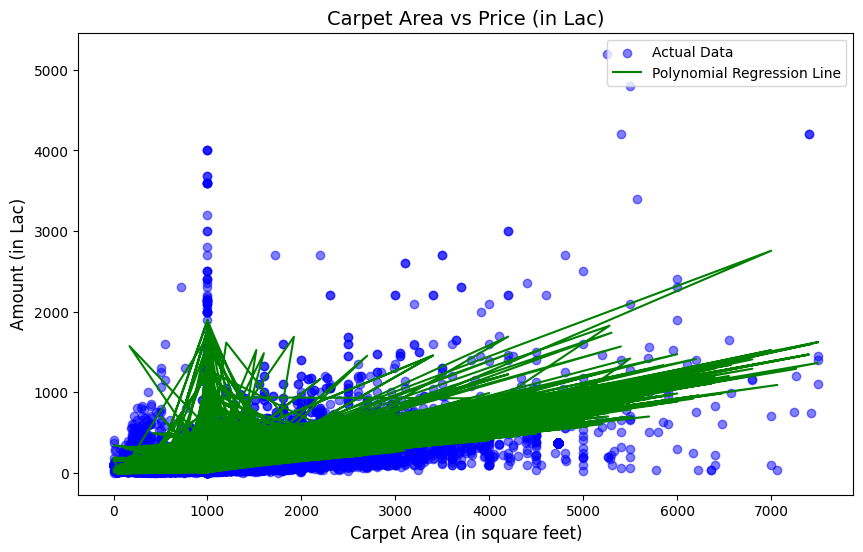

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


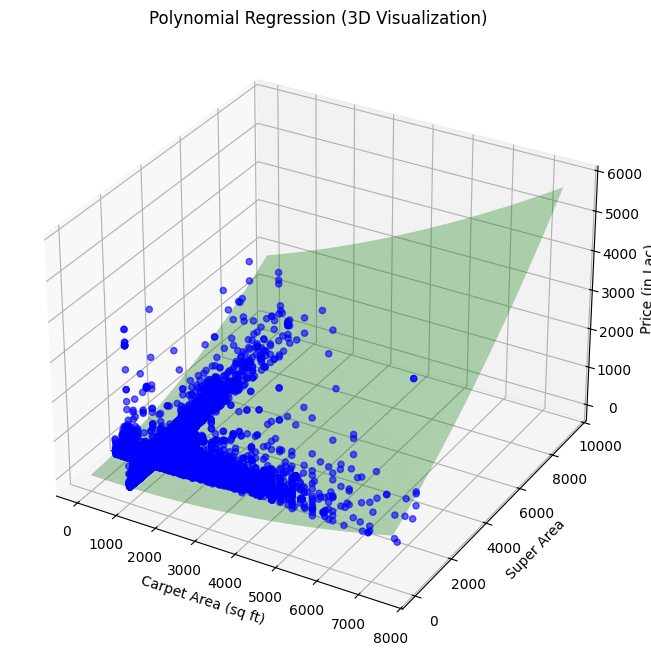

In [15]:
from sklearn.preprocessing import PolynomialFeatures
X2 = df[['Carpet Area', 'Balcony', 'Bathroom', 'Super Area']]  
y2 = df['Amount(in Lac)']  


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)  
X_poly_test = poly_features.transform(X_test)  

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)


y_pred_poly = poly_model.predict(X_poly_test)


rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression RMSE: {rmse_poly}')
print(f'Polynomial Regression R²: {r2_poly}')


X_poly_all = poly_features.transform(df[['Carpet Area', 'Balcony', 'Bathroom', 'Super Area']])
y_pred_poly_all = poly_model.predict(X_poly_all)


X_carpet = df['Carpet Area']  

plt.figure(figsize=(10, 6))
plt.scatter(X_carpet, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_carpet, y_pred_poly_all, color='green', label='Polynomial Regression Line')
plt.title('Carpet Area vs Price (in Lac)', fontsize=14)
plt.xlabel('Carpet Area (in square feet)', fontsize=12)
plt.ylabel('Amount (in Lac)', fontsize=12)
plt.legend()
plt.show()

# **3D Visualization of Polynomial Regression with Two Features (Carpet Area & Super Area)**

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Sample fewer points for visualization to avoid memory overflow
n_samples = 100  # Reduce the number of points used for meshgrid
X_carpet_sample = np.linspace(df['Carpet Area'].min(), df['Carpet Area'].max(), n_samples)
X_super_area_sample = np.linspace(df['Super Area'].min(), df['Super Area'].max(), n_samples)
X1, X2 = np.meshgrid(X_carpet_sample, X_super_area_sample)

# Predict using the polynomial model for 3D visualization
# We pass both 'Carpet Area' and 'Super Area' for prediction
X_plot = np.column_stack([X1.ravel(), np.zeros_like(X1.ravel()), np.zeros_like(X1.ravel()), X2.ravel()])
X_plot_poly = poly_features.transform(X_plot)
y_plot_pred = poly_model.predict(X_plot_poly).reshape(X1.shape)

# Plotting actual data points
ax.scatter(df['Carpet Area'], df['Super Area'], y, color='blue', alpha=0.6, label='Actual Data')

# Plotting the polynomial regression surface
ax.plot_surface(X1, X2, y_plot_pred, color='green', alpha=0.3)

# Setting labels
ax.set_title('Polynomial Regression (3D Visualization)')
ax.set_xlabel('Carpet Area (sq ft)')
ax.set_ylabel('Super Area')
ax.set_zlabel('Price (in Lac)')

plt.show()

In [21]:
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,  
    'Predicted Price (Linear Regression)': y_pred_linear,
    'Predicted Price (Polynomial)': y_pred_poly,
})

specific_indices = [2,37505]  


specific_rows_df = comparison_df.iloc[specific_indices]

print(specific_rows_df)


       Actual Price  Predicted Price (Linear Regression)  \
2              98.0                           104.195852   
37505          68.0                            89.439229   

       Predicted Price (Polynomial)  
2                        206.090741  
37505                     71.821206  


(2)Linear Regression seems to offer more stable predictions, but with some overestimation.

whereas 

(37505) Polynomial Regression shows a greater risk of overfitting, as seen in the first example where it predicts more than double the actual price. However, in the second example, it is more accurate than linear regression.